# First libraries and data loading


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('diabetes.csv')

# EDA 🔍

In [3]:
df.shape

(768, 9)

In [4]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


**Ok. Some columns should not have data with value zero, so we must treat them as Nan values.**

In [6]:
df_eda = df

In [7]:
df_eda["Glucose"].replace(0, np.nan, inplace=True)
df_eda["BloodPressure"].replace(0, np.nan, inplace=True)
df_eda["SkinThickness"].replace(0, np.nan, inplace=True)
df_eda["Insulin"].replace(0, np.nan, inplace=True)
df_eda["BMI"].replace(0, np.nan, inplace=True)
df_eda.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [8]:
df_eda.isnull().mean().sort_values(ascending=False)

Insulin                     0.486979
SkinThickness               0.295573
BloodPressure               0.045573
BMI                         0.014323
Glucose                     0.006510
Pregnancies                 0.000000
DiabetesPedigreeFunction    0.000000
Age                         0.000000
Outcome                     0.000000
dtype: float64

**We see that insulin and SkinThickness have the most unknown values, let's see if we find any relation in this**

<Figure size 720x576 with 0 Axes>

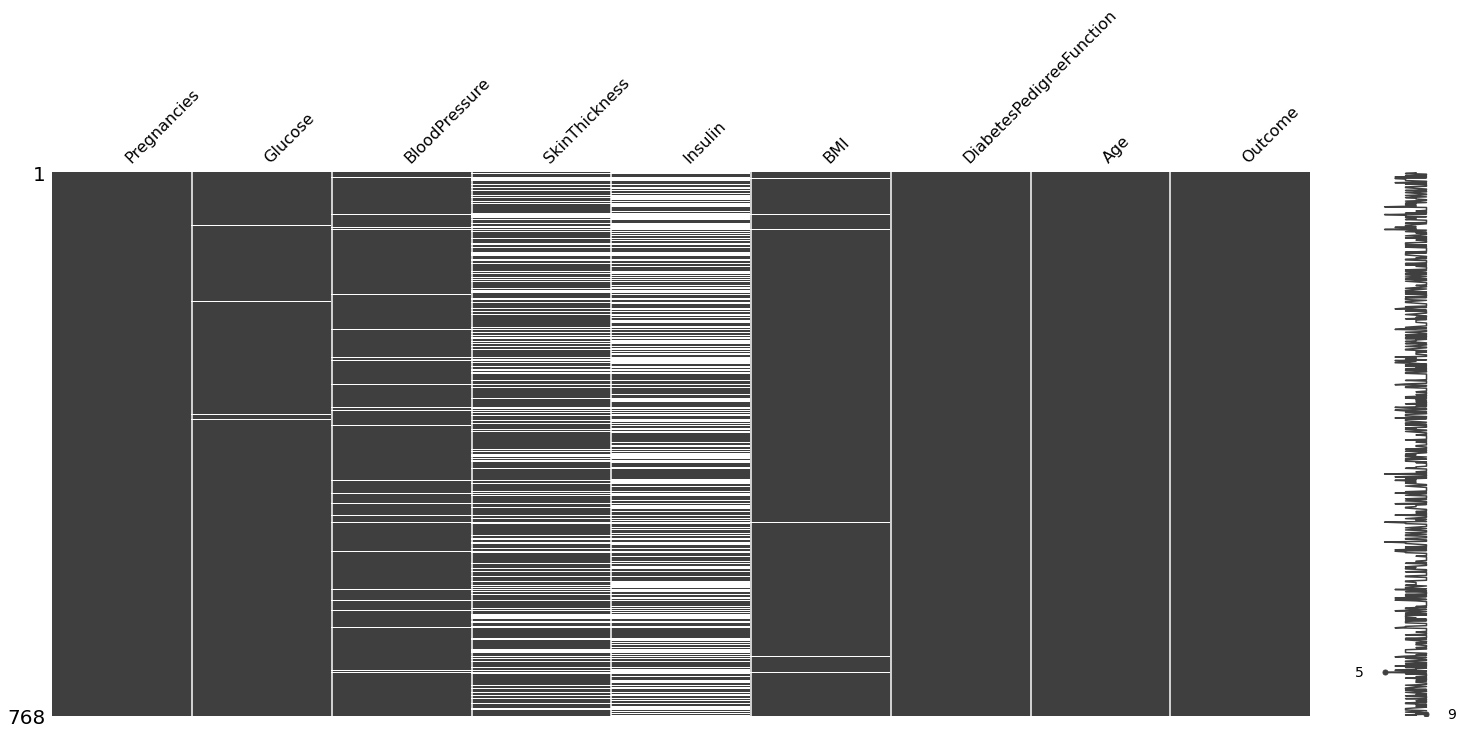

In [9]:
import missingno as msno
plt.figure(figsize = (10,8))
msno.matrix(df_eda)
plt.show()

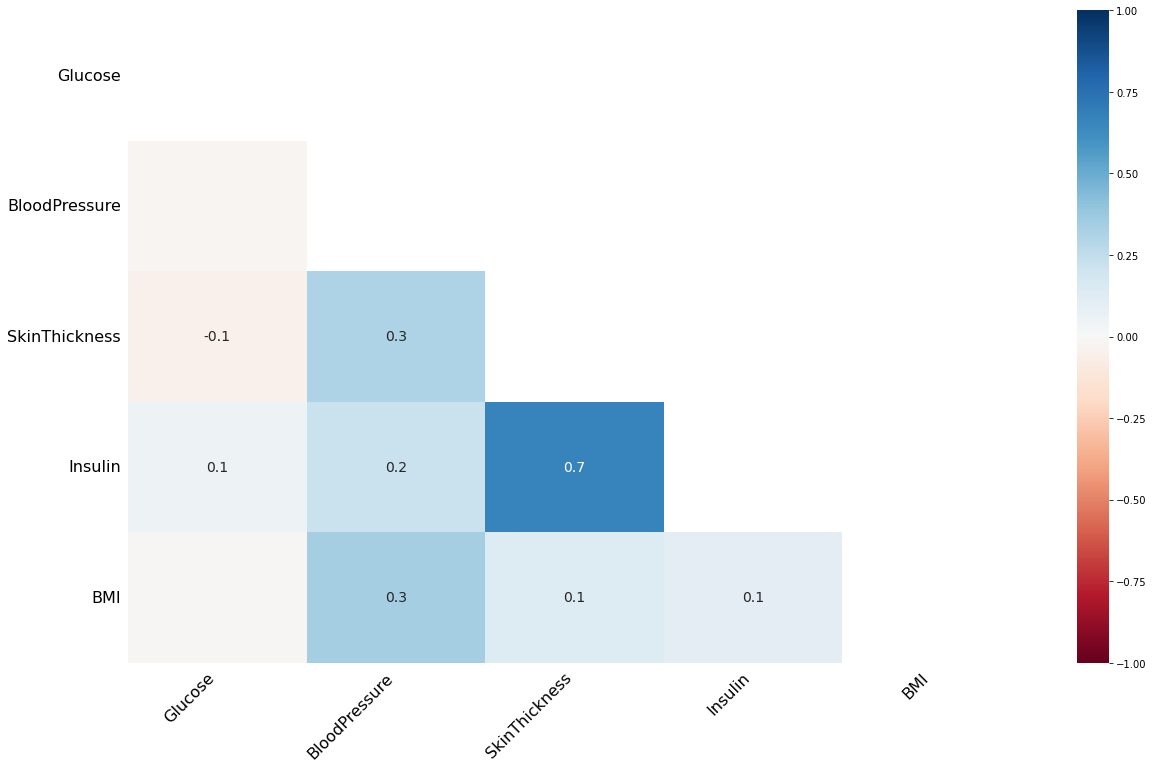

In [10]:
msno.heatmap(df_eda)
plt.show()

**We see a strong correlation between these two variables, let's see if we can understand why.**

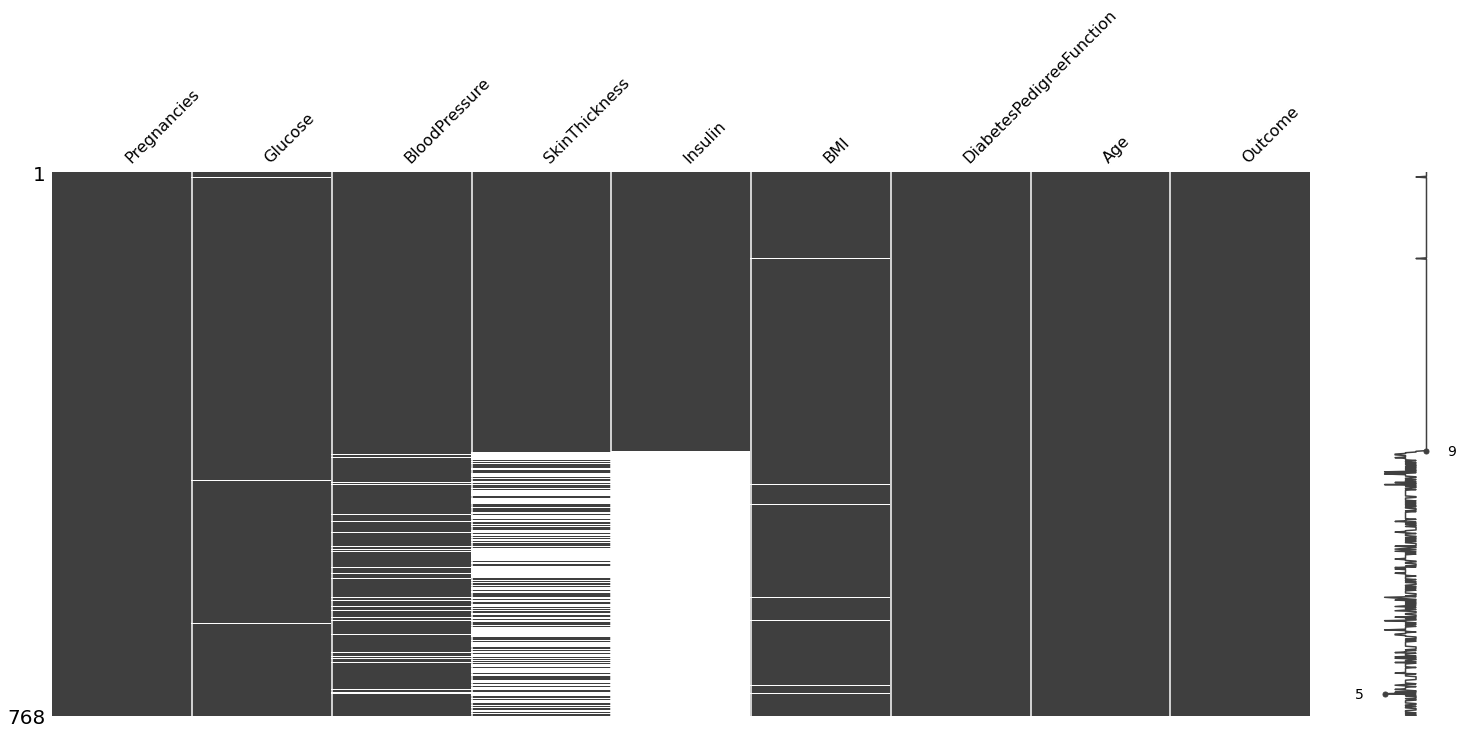

In [11]:
msno.matrix(df_eda.sort_values("Insulin"))
plt.show()

**Well, we don't seem to understand why there are so many missing values in these two columns🤔.**

## Imputation of NAs

In [18]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [19]:
ii_imp = IterativeImputer(estimator=ExtraTreesRegressor(), max_iter=15, random_state= 0)
df_eda.loc[:, :] = ii_imp.fit_transform(df_eda)

In [20]:
df_eda.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Let's analyze the variables

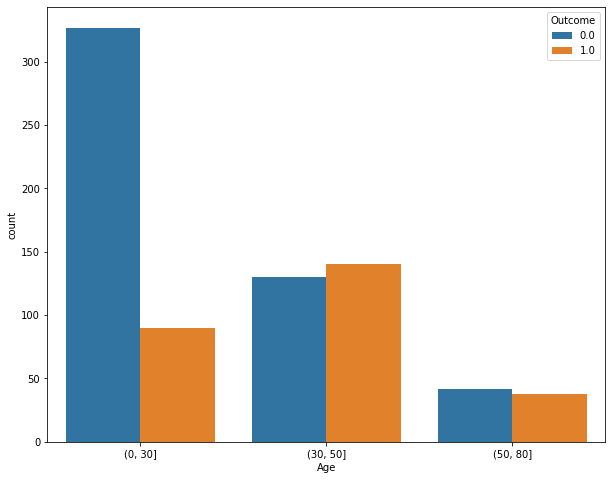

In [21]:
bins=[0,30,50,80]
plt.figure(figsize=(10,8))
sns.countplot(x=pd.cut(df.Age, bins=bins), hue=df.Outcome)
plt.show()

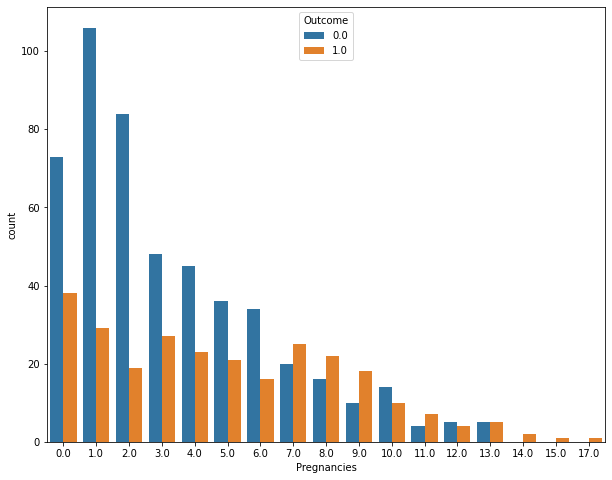

In [22]:
plt.figure(figsize=(10,8))
sns.countplot(df.Pregnancies, hue=df.Outcome)
plt.show()

* **We cannot say much about the number of pregnancies, but we see that women with 7, 8, 9, 11 pregnancies have more diabetics than non-diabetics.**
* **between the ages of 30 - 60 diabetes is more common**

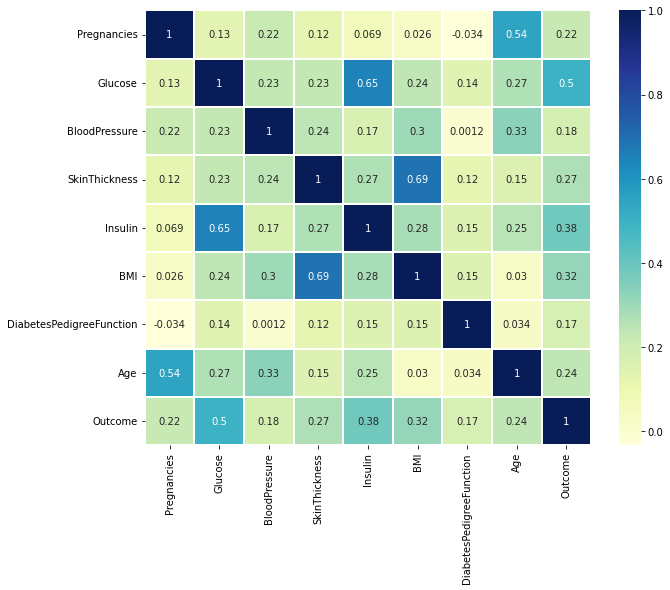

In [23]:
plt.figure(figsize=(10,8))
sns.heatmap(data=df_eda.corr(),cmap="YlGnBu", annot=True ,linewidths=0.2, linecolor='white')
plt.show()

**Glucose seems to be the variable X that is most closely related to our variable , although no very high correlation is seen, it is not very high.**

In [24]:
def plot_uni(d):
    f,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
    sns.histplot(d, kde=True, ax=ax[0])
    ax[0].axvline(d.mean(), color='y', linestyle='--',linewidth=2)
    ax[0].axvline(d.median(), color='r', linestyle='dashed', linewidth=2)
    ax[0].axvline(d.mode()[0],color='g',linestyle='solid',linewidth=2)
    ax[0].legend({'Mean':d.mean(),'Median':d.median(),'Mode':d.mode()})
    
    sns.boxplot(x=d, showmeans=True, ax=ax[1])
    plt.tight_layout()

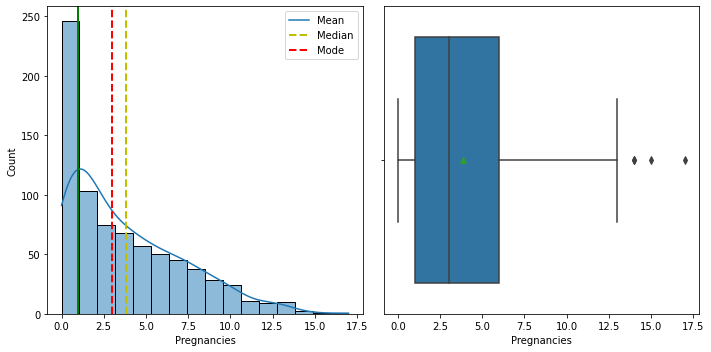

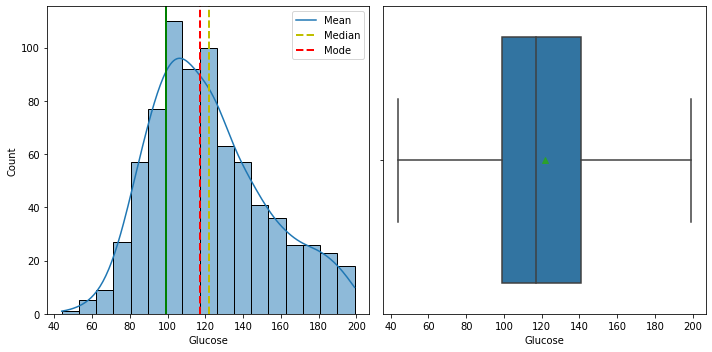

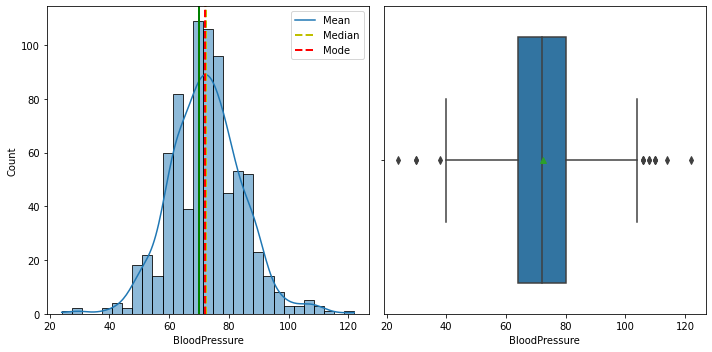

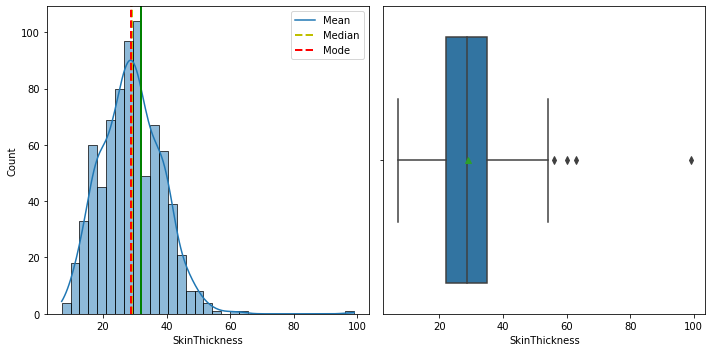

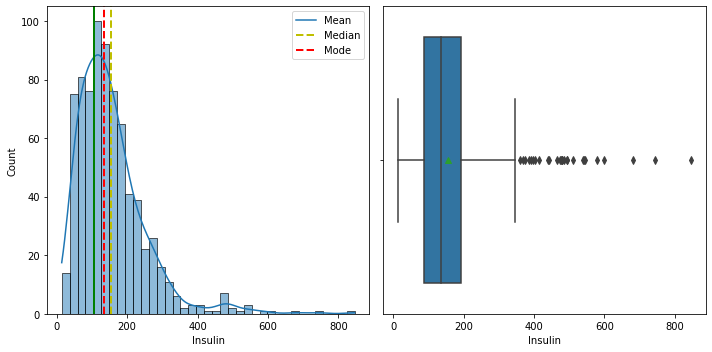

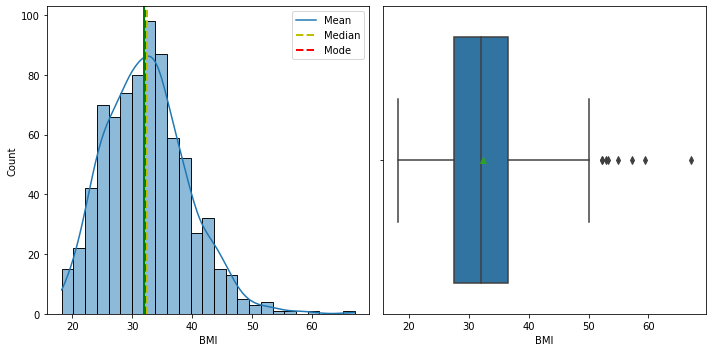

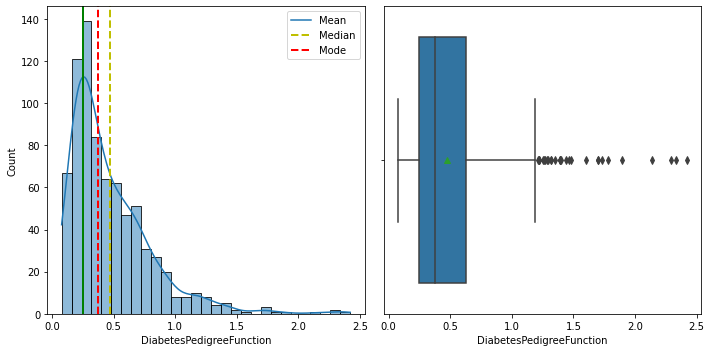

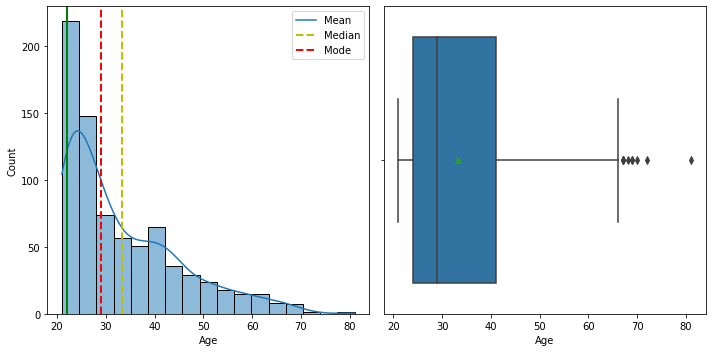

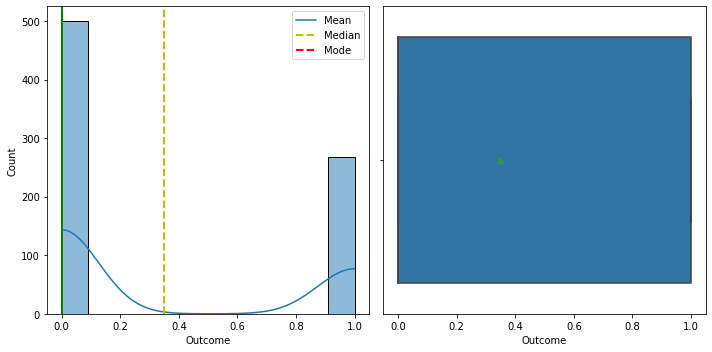

In [25]:
for f in df_eda:
    plot_uni(df[f])

**The distributions of the variables are not bad, but we can improve them. The occurrence of outliers is frequent, so we will work on this later.**

In [26]:
df_eda.Outcome.value_counts()

0.0    500
1.0    268
Name: Outcome, dtype: int64

**The Outcome values are unbalanced, this could be a problem for our models, so we will also work on this later.**

## Bi-variate Analysis

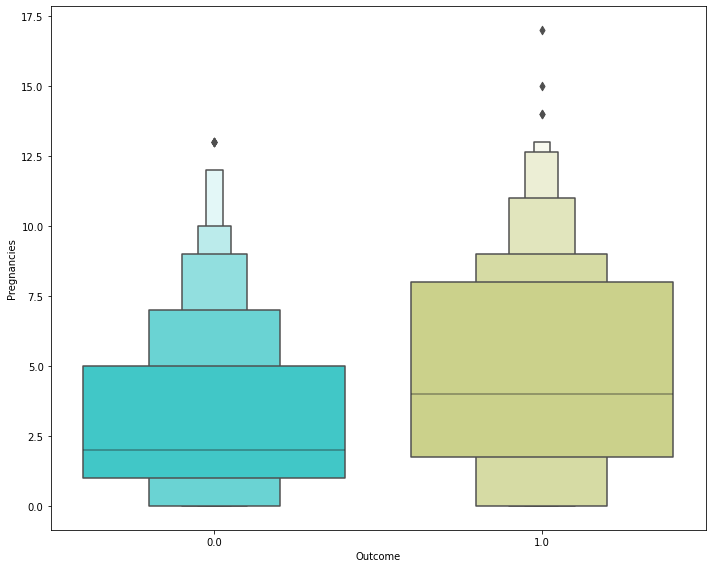

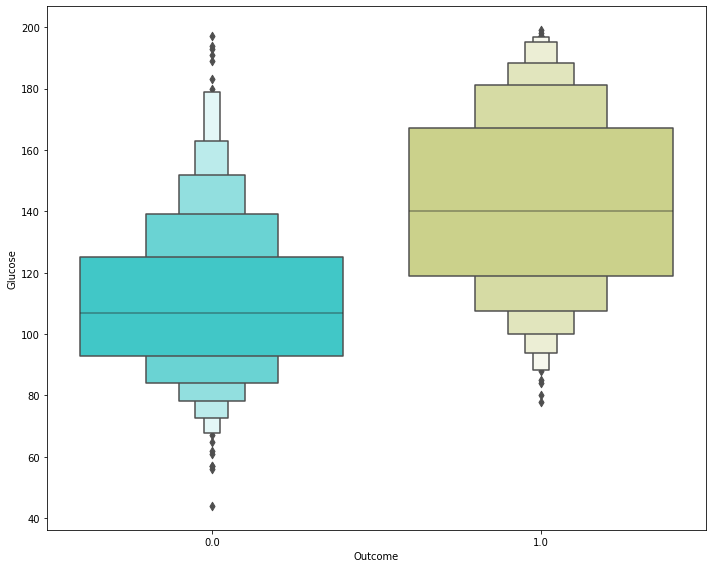

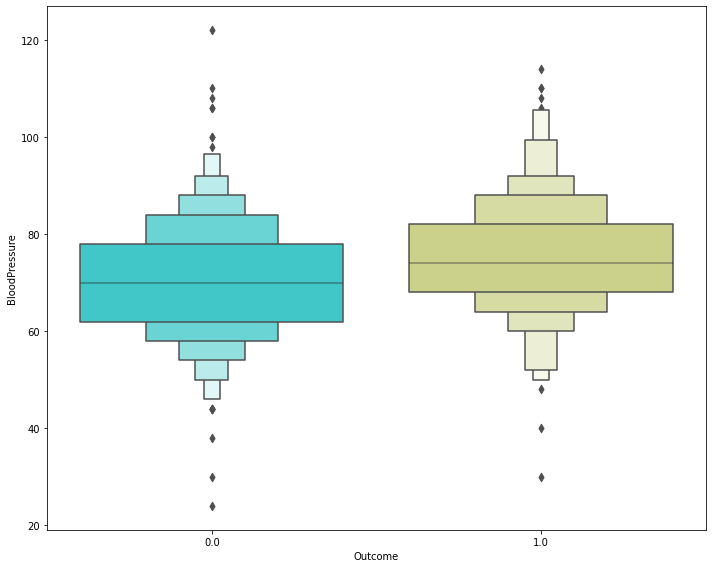

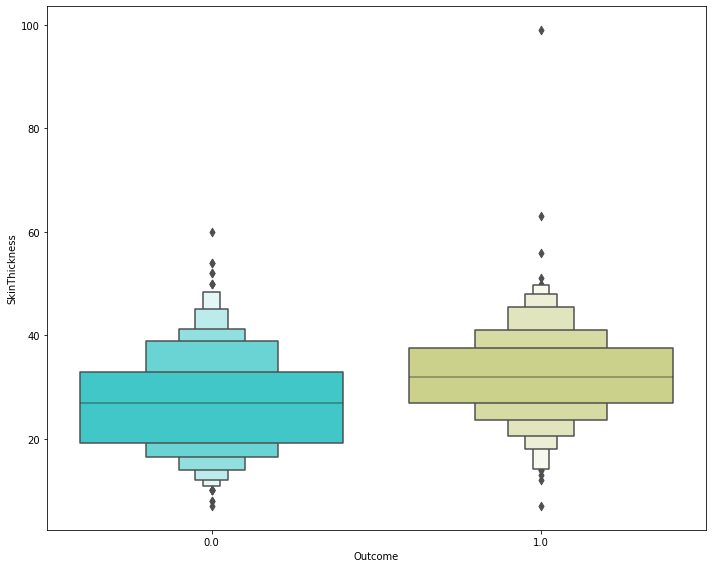

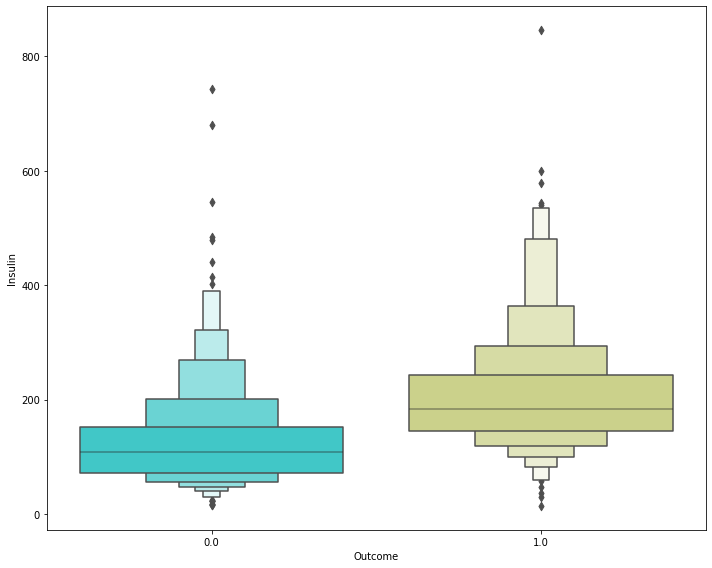

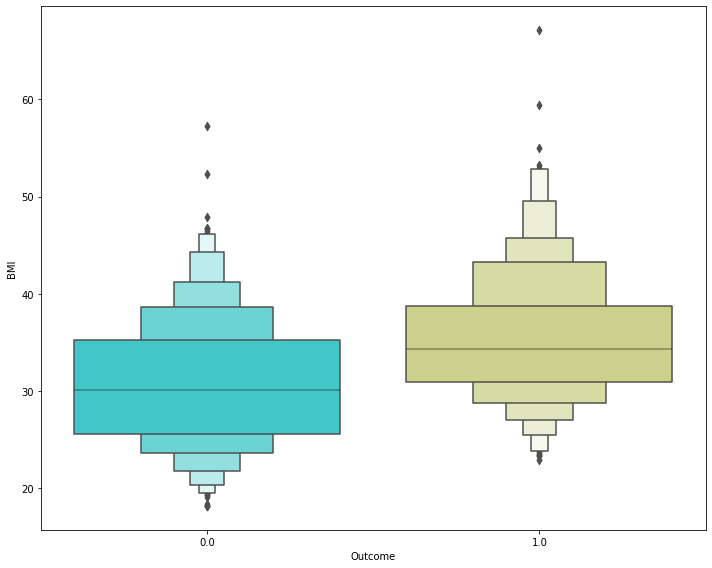

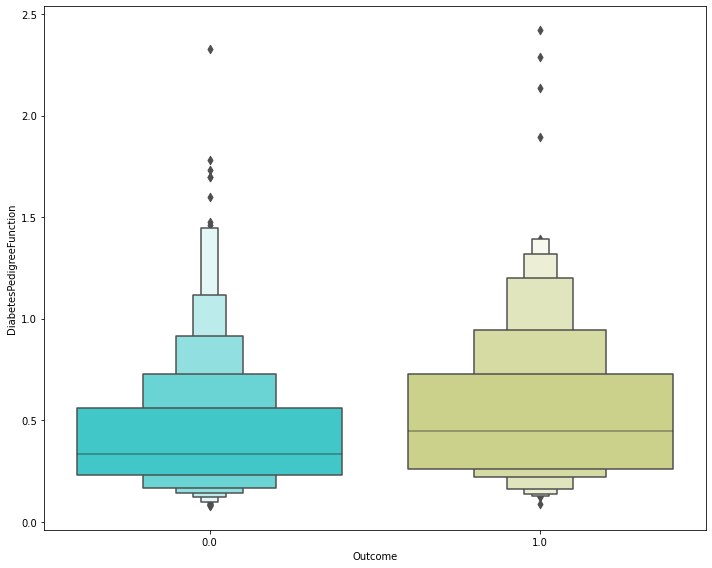

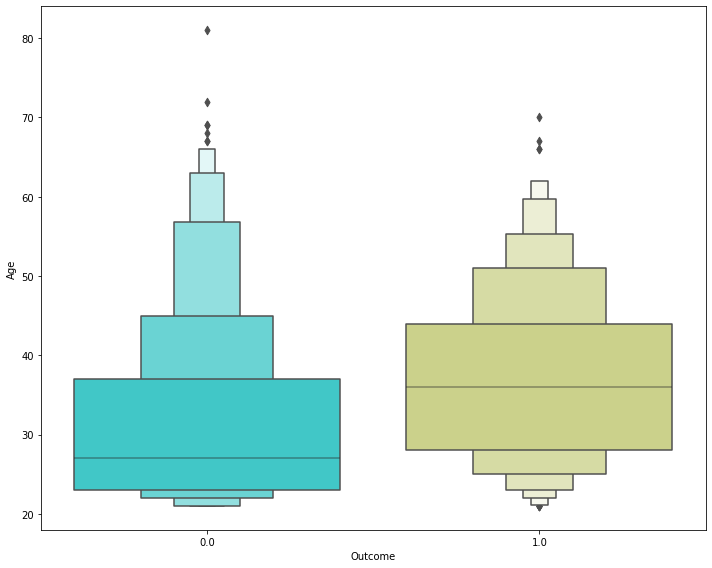

In [27]:
def plot_dis(d):
    f,ax = plt.subplots(nrows=1,ncols=1,figsize=(10,8))   
    sns.boxenplot(x ='Outcome',y = d,  data = df ,palette = 'rainbow')
    plt.tight_layout()
for f in df_eda.drop('Outcome', axis = 1):
    plot_dis(df_eda[f])

**Pregnancies and Outcome: Pregnant patients with and without diabetes have the same median and iqr, non-diabetic patients have more variation.**

**Glucose and Outcome: Both have outliers but non-diabetics are more skewed. Diabetic patients have a higher iqr and both have the same median.**

**BloodPressure and Outcome: Non-diabetic and diabetic patients have the same median. Both have a similar number of outliers. the iqr of diabetic patients is slightly higher.**

**SkinThickness and Outcome: Both have outliers but diabetics have one with an extremely high skin thickness value. They have the same median and a similar iqr.**

**Insulin and Outcome: The median for non-diabetics is slightly higher. Both contain outliers, the value in non-diabetic patients is much more varied. Diabetic patients have a higher iqr.**

**BMI and Outcome: Same median, same level of variance and both contain some outliers. The iqr of diabetics is higher.**

**DiabetesPedigreeFunction and Outcome: The level of variance in non-diabetic patients is slightly higher. They have the same median and although both have outliers in diabetic patients there may be a little more bias.**

**Age and Outcome: There is much more variance in non-diabetic patients. Diabetic patients have a higher median. The iqr of non-diabetics is higher and their data could be more skewed, both contain outliers.**

<Figure size 720x576 with 0 Axes>

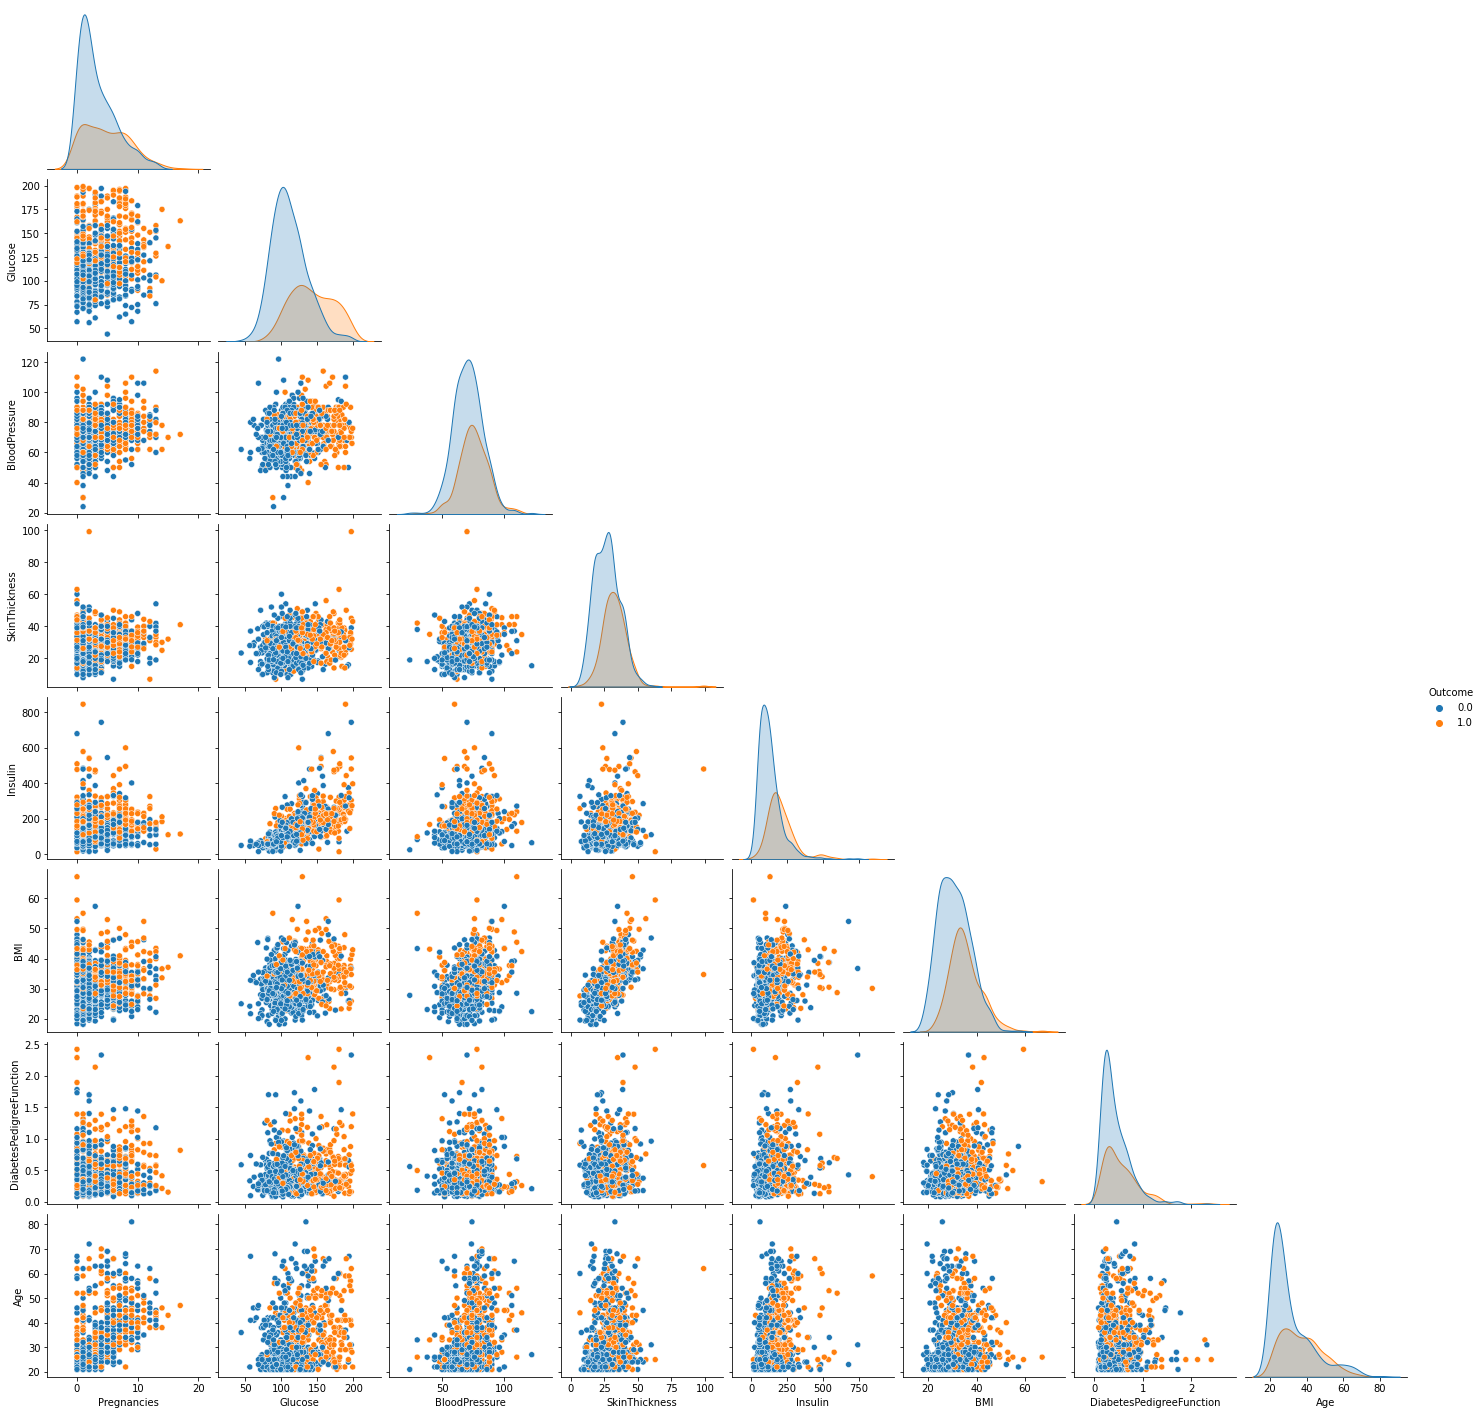

In [28]:
plt.figure(figsize=(10,8))
sns.pairplot(df_eda,hue='Outcome',corner=True)
plt.show()

# Eliminating Bias and Fixing the Asymmetry

In [29]:
df_skew = pd.DataFrame(data={
    'skewness': df_eda.skew()})
df_skew

,skewness
Pregnancies,0.901674
Glucose,0.532783
BloodPressure,0.141113
SkinThickness,0.668606
Insulin,2.093013
BMI,0.605203
DiabetesPedigreeFunction,1.919911
Age,1.129597
Outcome,0.635017


In [30]:
from sklearn import preprocessing
pt = preprocessing.PowerTransformer()
for col in df_eda.drop(['Outcome'], axis =1).columns:
  df_eda[col] = pt.fit_transform(df_eda[col].values.reshape(-1,1))

In [31]:
df_skew = pd.DataFrame(data={
    'skewness': df_eda.skew()})
df_skew

,skewness
Pregnancies,-0.044644
Glucose,-0.001627
BloodPressure,0.056335
SkinThickness,0.019585
Insulin,0.007273
BMI,-0.000327
DiabetesPedigreeFunction,0.142321
Age,0.150219
Outcome,0.635017


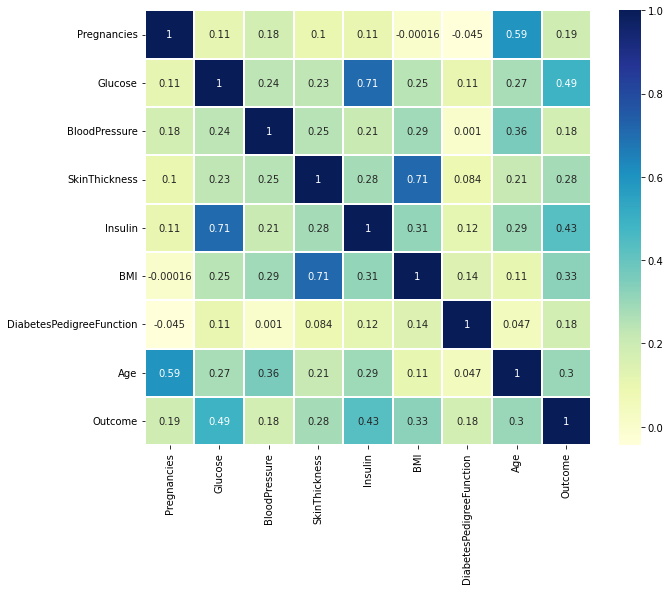

In [32]:
plt.figure(figsize=(10,8))
sns.heatmap(data=df_eda.corr(),cmap="YlGnBu", annot=True ,linewidths=0.2, linecolor='white')
plt.show()

> **We adjust the skewness to make the distribution more Gaussian. This makes the job easier for most models😁.**

In [33]:
import scipy.stats as stats
z = np.abs(stats.zscore(df_eda))
print(df_eda.shape)

(768, 9)


In [34]:
df_eda = df_eda[(z < 3).all(axis=1)]
print(df_eda.shape)

(753, 9)


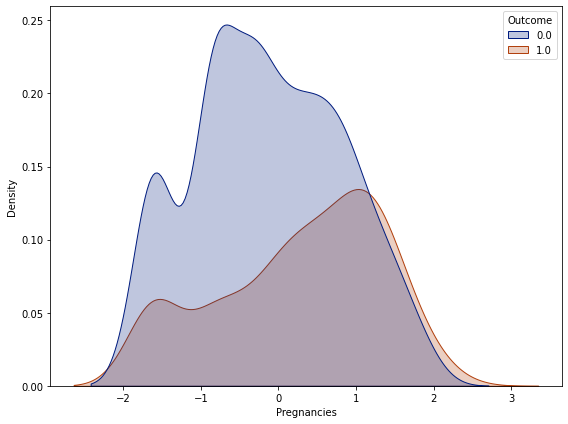

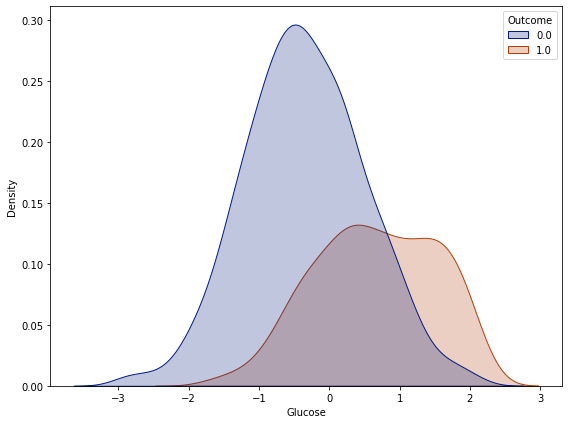

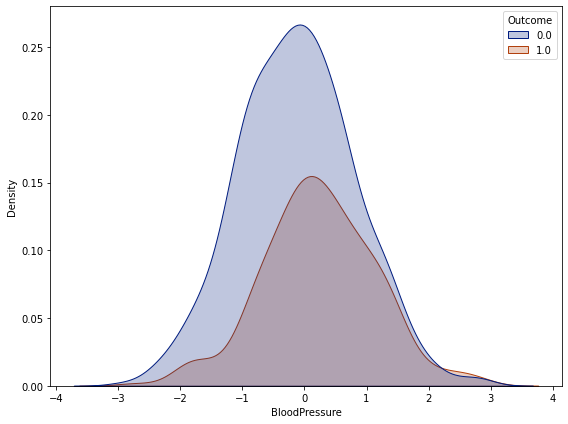

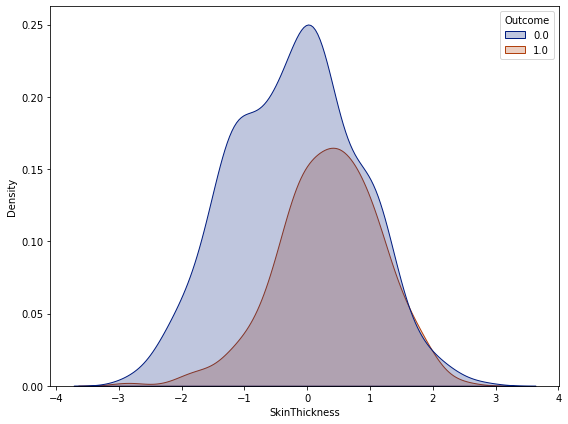

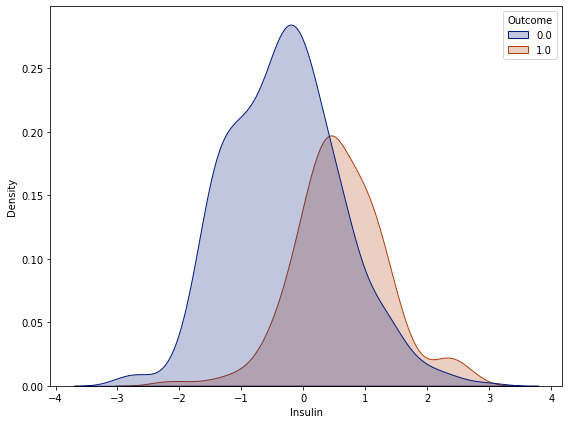

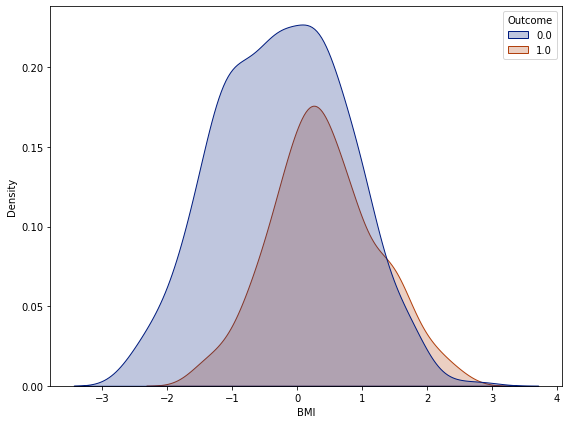

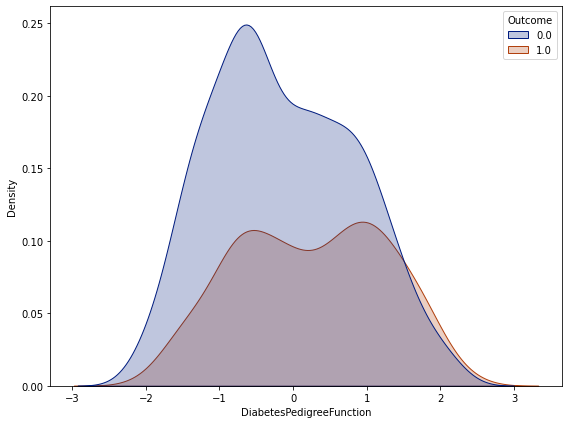

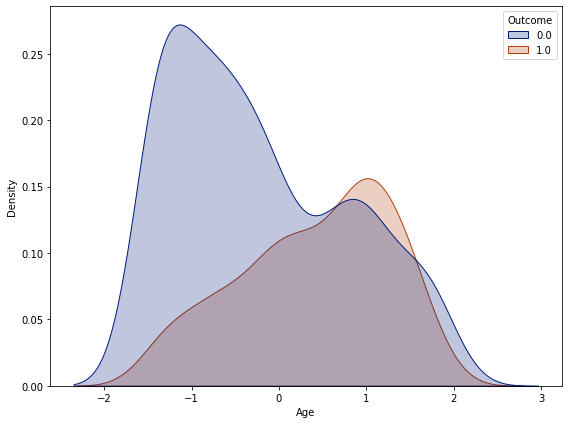

In [35]:
for col in df_eda.drop('Outcome', axis = 1):
  f,ax = plt.subplots(nrows=1,ncols=1,figsize=(8,6))    
  sns.kdeplot(data = df_eda, x = col, hue = 'Outcome', fill = 'dark', palette = 'dark' )
  plt.tight_layout()

**Let's see how the Variance was**

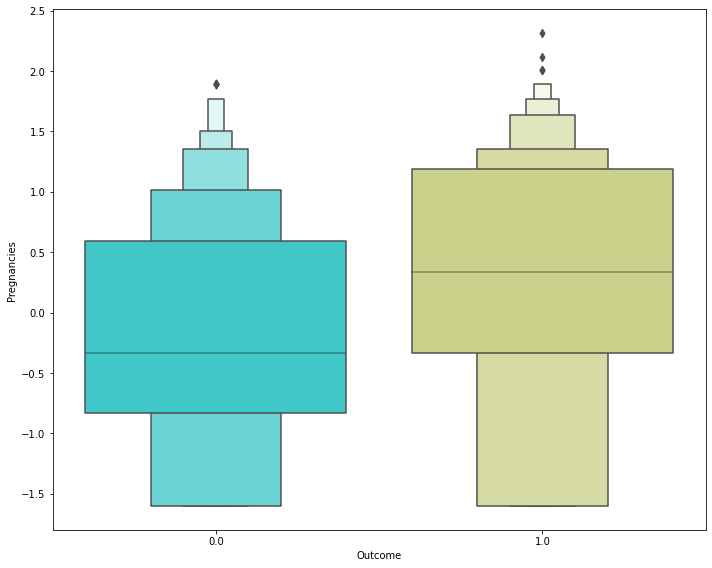

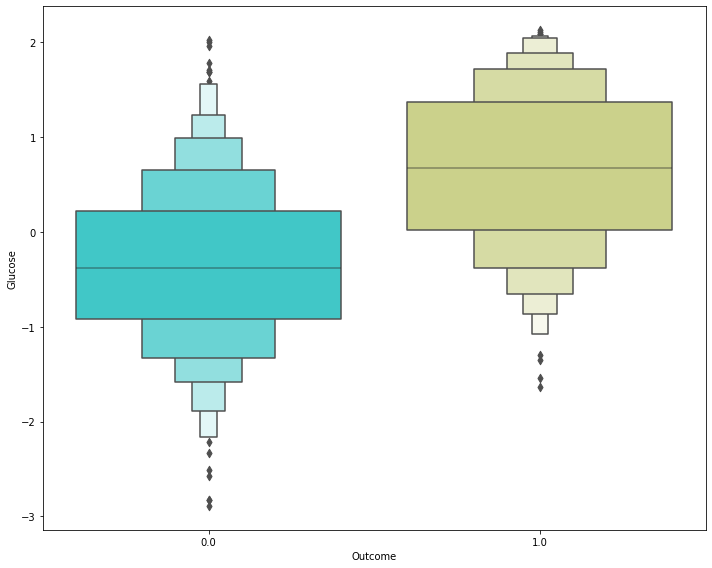

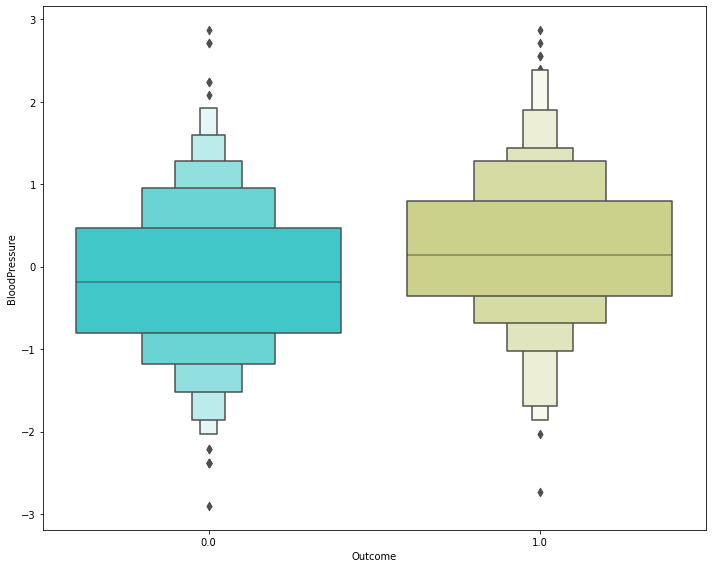

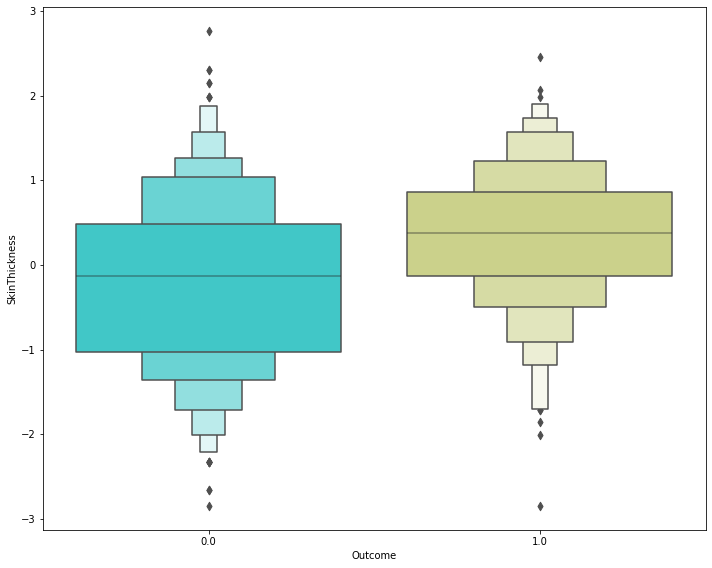

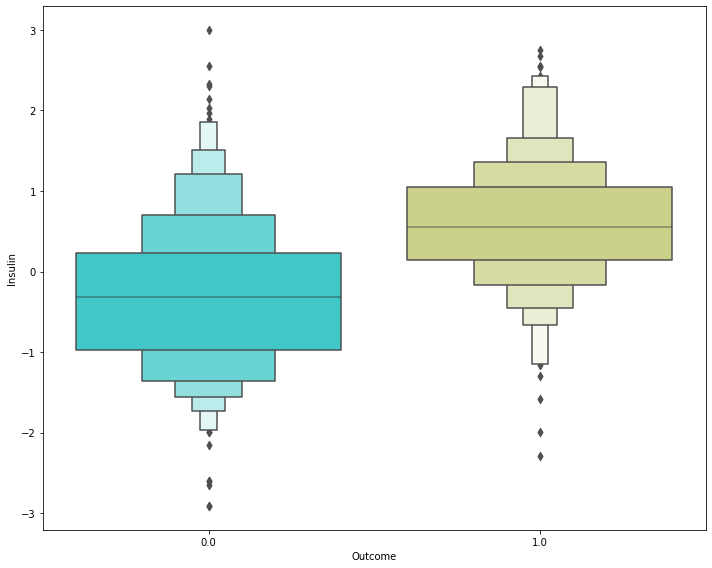

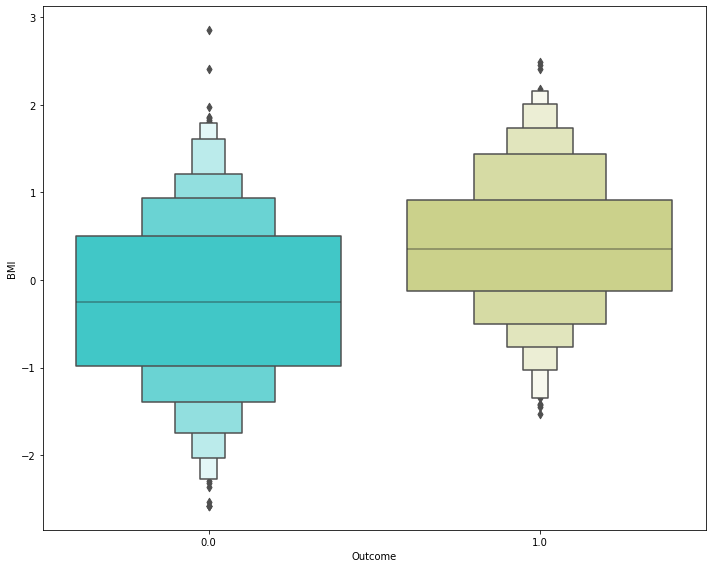

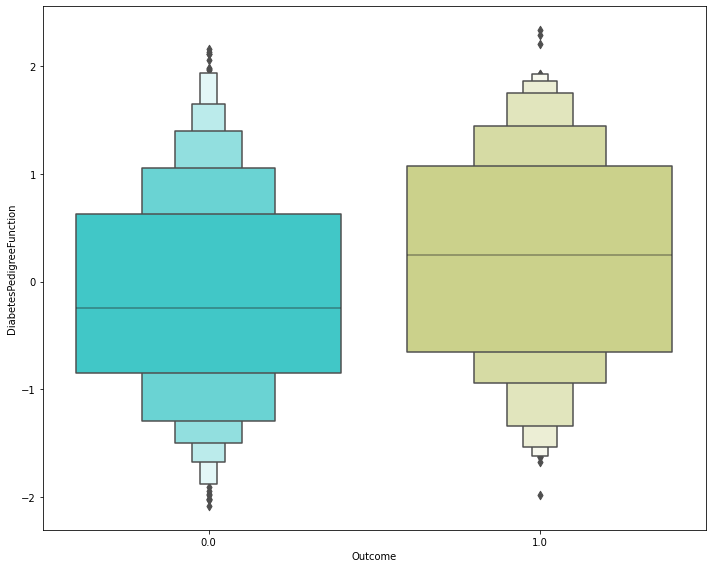

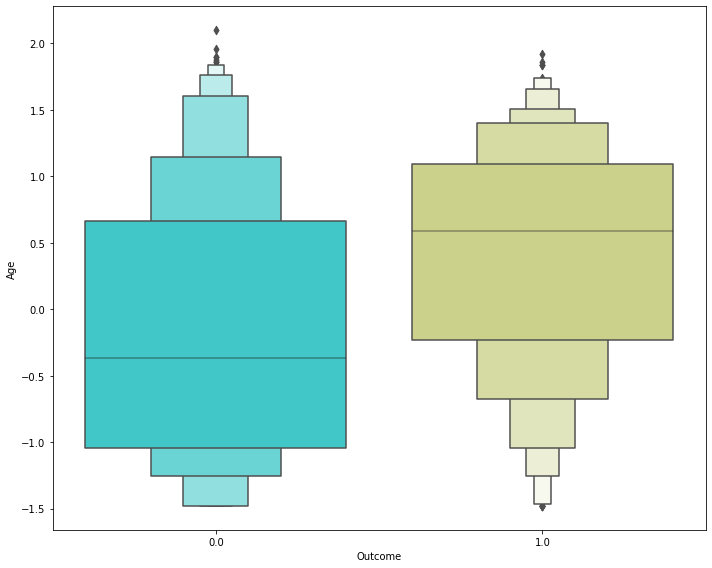

In [36]:
for f in df_eda.drop(['Outcome'], axis =1).columns:
    plot_dis(df_eda[f])

> **Ok, I'm uncomfortable with the amount of outliers that the dataset still has😅, so I'm going to work a little more on that. Variance levels are well** 

In [37]:
for col in df_eda:
    if col in df_eda.drop('Outcome', axis =1):
        q75,q25 = np.percentile(df_eda.loc[:,col],[75,25])
        iqr = q75-q25
     
        max = q75+(1.5*iqr)
        min = q25-(1.5*iqr)
     
        df_eda.loc[df[col] < min,col] = np.nan
        df_eda.loc[df[col] > max,col] = np.nan
print(df_eda.isna().sum())

Pregnancies                  0
Glucose                      3
BloodPressure                7
SkinThickness                3
Insulin                     11
BMI                          1
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64


In [38]:
df_eda = df_eda.dropna()
print(df_eda.isna().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


**Let's check if the distribution of the variables is normal with the QQ diagrams.**

In [41]:
import statsmodels.api as sm
def plot_qq(d):
    f,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,8))   
    sns.histplot(d, ax= ax[0])
    ax[0].axvline(d.mean(), color='y', linestyle='--',linewidth=2)
    ax[0].axvline(d.median(), color='r', linestyle='dashed', linewidth=2)
    ax[0].axvline(d.mode()[0],color='g',linestyle='solid',linewidth=2)
    ax[0].legend({'Mean':d.mean(),'Median':d.median(),'Mode':d.mode()})
    sm.qqplot(d, line="s", ax= ax[1], fmt='b')
    ax= ax[1].set_title(col)
    plt.tight_layout()

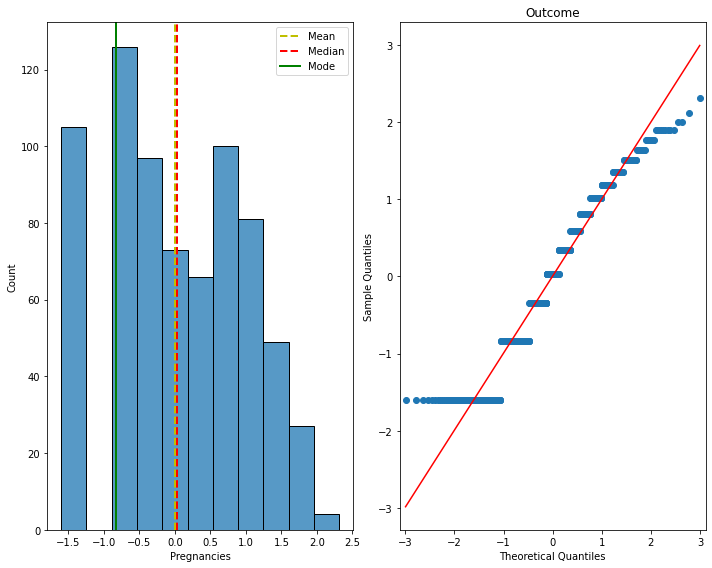

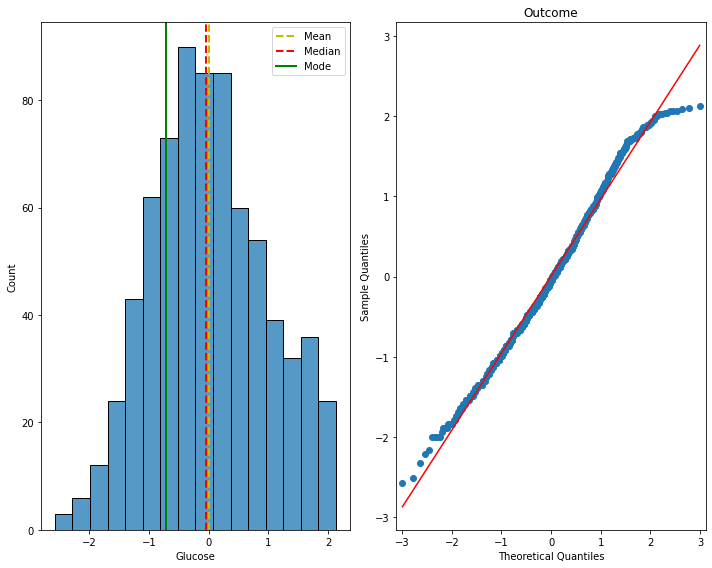

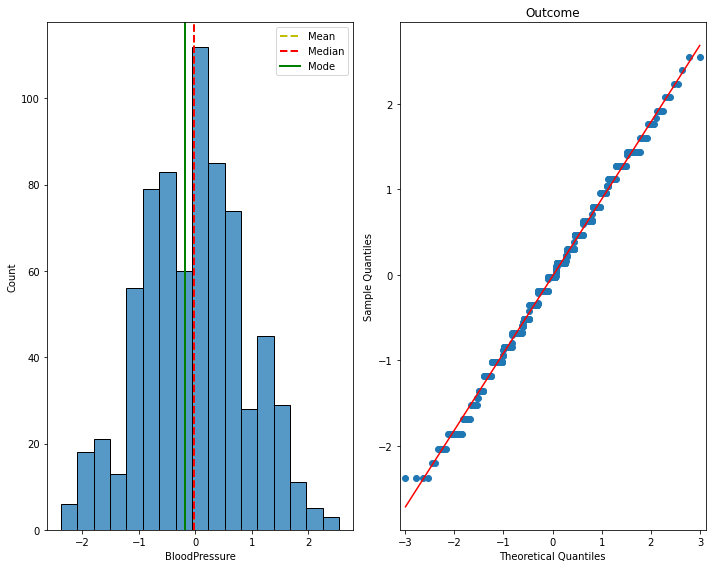

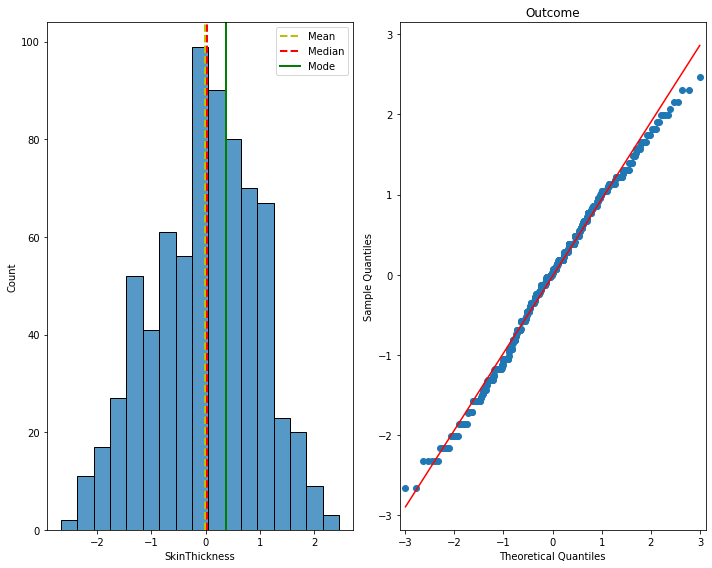

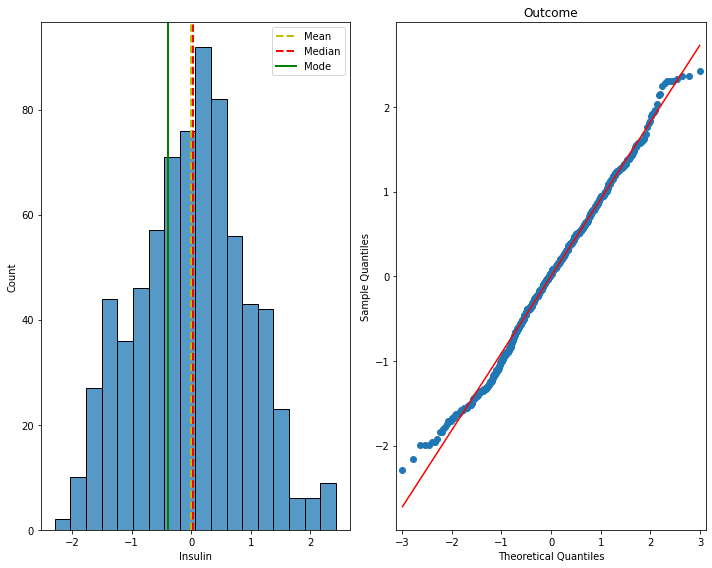

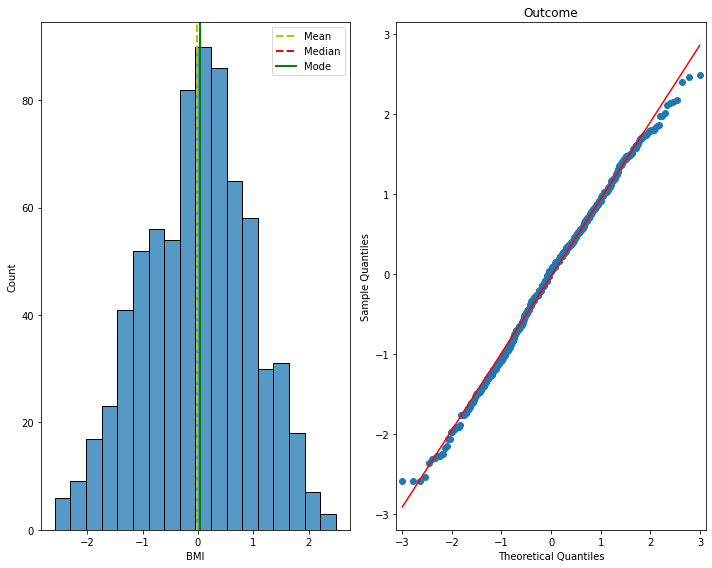

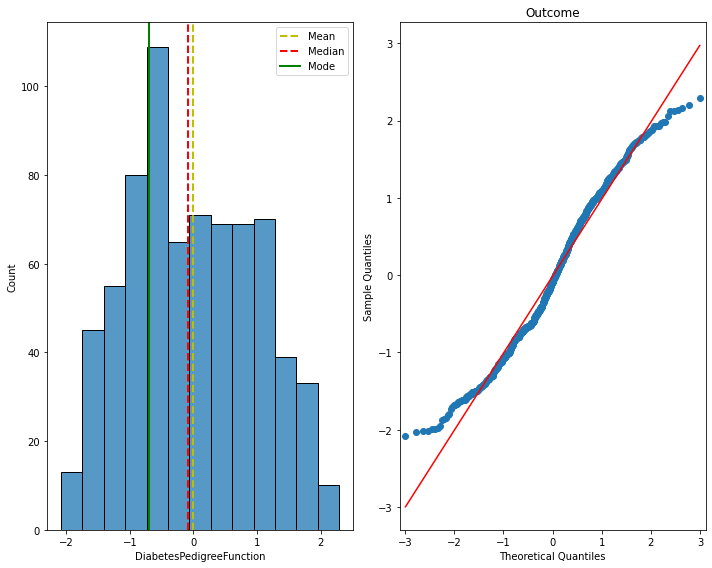

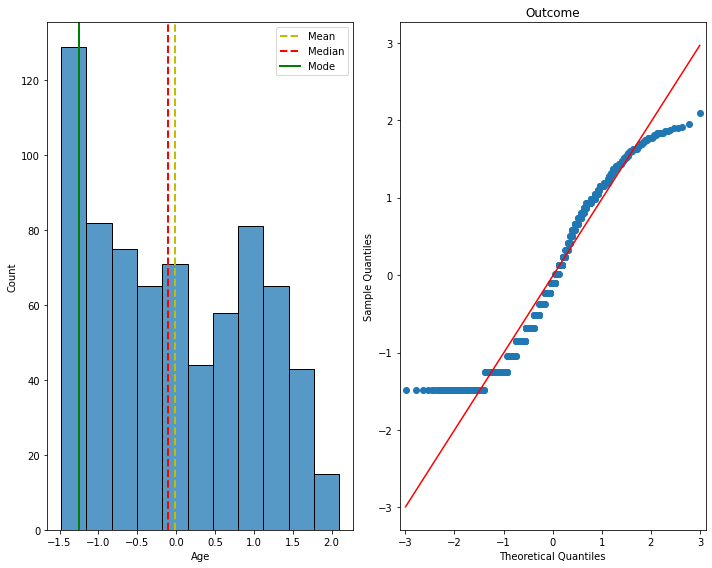

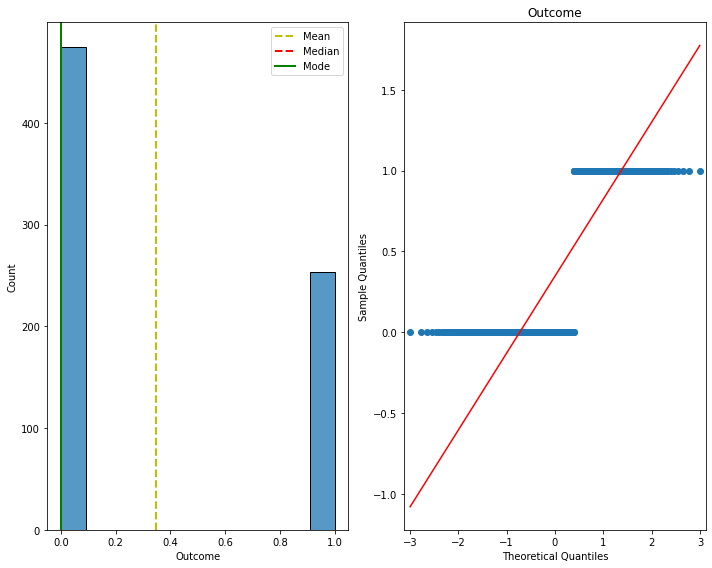

In [42]:
for f in df_eda:
    plot_qq(df_eda[f])

> **The distributions already have a fairly normal distribution. Finally, before moving on to modeling, let's fix the imbalance in our Outcome variable**

In [43]:
X = df_eda.iloc[:, :-1]
y = df_eda.iloc[:, -1]

In [48]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state = 15)
print(df_eda.Outcome.value_counts())  

0.0    475
1.0    253
Name: Outcome, dtype: int64


In [49]:
X_res,y_res=smk.fit_resample(X,y)
print(y_res.value_counts())

1.0    463
0.0    463
Name: Outcome, dtype: int64


In [50]:
X = X_res
y = y_res

**We define the test and training sets and scale the variables**

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [52]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Models 🤖

In [53]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
models = pd.DataFrame(columns=["Model","Accuracy Score"])

### Logistic Regression

Text(0.5, 1.0, 'Logistic Regression')

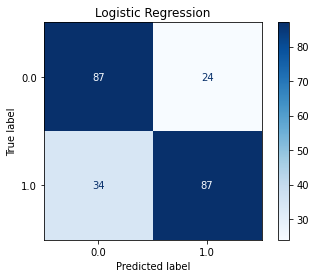

In [54]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state = 0)
log_reg.fit(X_train, y_train)
predictions = log_reg.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, predictions, cmap = plt.cm.Blues)
plt.title('Logistic Regression')

In [55]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.72      0.78      0.75       111
         1.0       0.78      0.72      0.75       121

    accuracy                           0.75       232
   macro avg       0.75      0.75      0.75       232
weighted avg       0.75      0.75      0.75       232



In [56]:
score = accuracy_score(y_test, predictions)

new_row = {"Model": "LogisticRegression", "Accuracy Score": score}
models = models.append(new_row, ignore_index=True)

### K-Nearest Neighbors (Knn)

Text(0.5, 1.0, 'KNN')

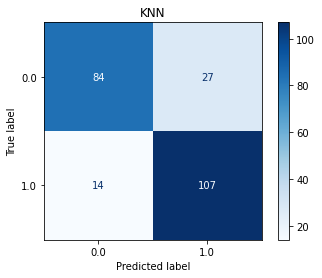

In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, predictions, cmap = plt.cm.Blues)
plt.title('KNN')

In [58]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.86      0.76      0.80       111
         1.0       0.80      0.88      0.84       121

    accuracy                           0.82       232
   macro avg       0.83      0.82      0.82       232
weighted avg       0.83      0.82      0.82       232



In [59]:
score = accuracy_score(y_test, predictions)

new_row = {"Model": "KNN", "Accuracy Score": score}
models = models.append(new_row, ignore_index=True)

### Suport Vector Machine (svm)

Text(0.5, 1.0, 'SVM')

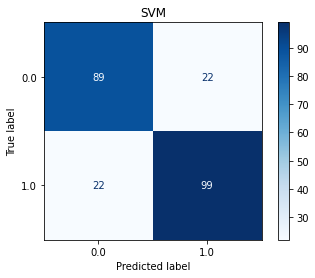

In [60]:
from sklearn.svm import SVC
svm = SVC(kernel = "rbf", random_state = 0)
svm.fit(X_train, y_train) 
predictions = svm.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, predictions, cmap = plt.cm.Blues)
plt.title('SVM')

In [61]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.80      0.80      0.80       111
         1.0       0.82      0.82      0.82       121

    accuracy                           0.81       232
   macro avg       0.81      0.81      0.81       232
weighted avg       0.81      0.81      0.81       232



In [62]:
score = accuracy_score(y_test, predictions)

new_row = {"Model": "SVM", "Accuracy Score": score}
models = models.append(new_row, ignore_index=True)

### Naive bayes

Text(0.5, 1.0, 'Naive Bayes')

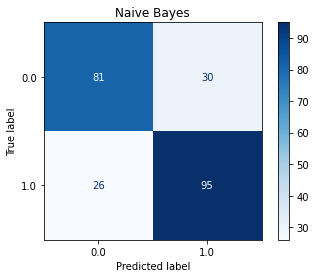

In [63]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
predictions = nb.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, predictions, cmap = plt.cm.Blues)
plt.title('Naive Bayes')

In [64]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.76      0.73      0.74       111
         1.0       0.76      0.79      0.77       121

    accuracy                           0.76       232
   macro avg       0.76      0.76      0.76       232
weighted avg       0.76      0.76      0.76       232



In [65]:
score = accuracy_score(y_test, predictions)

new_row = {"Model": "NaiveBayes", "Accuracy Score": score}
models = models.append(new_row, ignore_index=True)

### Random Forest

Text(0.5, 1.0, 'Random Forest')

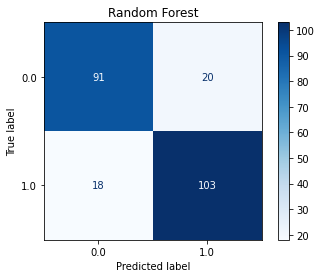

In [66]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier(n_estimators = 200, criterion = "gini", random_state = 0)
randomforest.fit(X_train, y_train)
predictions = randomforest.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, predictions, cmap = plt.cm.Blues)
plt.title('Random Forest')

In [67]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.83      0.82      0.83       111
         1.0       0.84      0.85      0.84       121

    accuracy                           0.84       232
   macro avg       0.84      0.84      0.84       232
weighted avg       0.84      0.84      0.84       232



In [68]:
score = accuracy_score(y_test, predictions)

new_row = {"Model": "RandomForest", "Accuracy Score": score}
models = models.append(new_row, ignore_index=True)

### XGBoost

[23:44:00] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Text(0.5, 1.0, 'XGBoost')

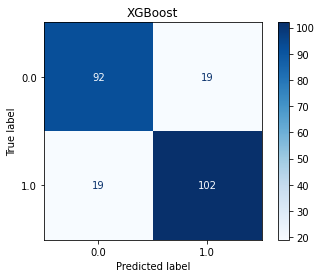

In [76]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(X_train, y_train)
predictions = XGB.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, predictions, cmap = plt.cm.Blues)
plt.title('XGBoost')

In [77]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83       111
         1.0       0.84      0.84      0.84       121

    accuracy                           0.84       232
   macro avg       0.84      0.84      0.84       232
weighted avg       0.84      0.84      0.84       232



Text(0.5, 1.0, 'CatBoost')

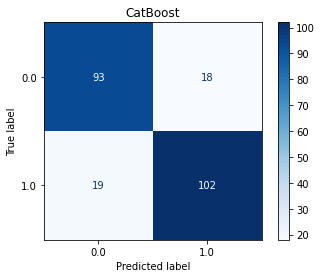

In [81]:
from catboost import CatBoostClassifier
CatBoost = CatBoostClassifier(verbose=False)
CatBoost.fit(X_train,y_train,eval_set=(X_test, y_test))
predictions = CatBoost.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, predictions, cmap = plt.cm.Blues)
plt.title('CatBoost')

In [82]:
score = accuracy_score(y_test, predictions)

new_row = {"Model": "XGBoost", "Accuracy Score": score}
models = models.append(new_row, ignore_index=True)

In [83]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.83      0.84      0.83       111
         1.0       0.85      0.84      0.85       121

    accuracy                           0.84       232
   macro avg       0.84      0.84      0.84       232
weighted avg       0.84      0.84      0.84       232



In [84]:
score = accuracy_score(y_test, predictions)

new_row = {"Model": "CatBoost", "Accuracy Score": score}
models = models.append(new_row, ignore_index=True)

### ExtraTreeClassifier

Text(0.5, 1.0, 'ExtraTreeClassifier')

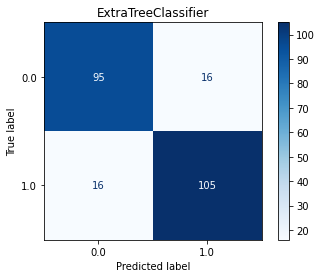

In [85]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators = 200,
                                        criterion ='entropy', max_features = 'auto')
etc.fit(X_train,y_train)
predictions = etc.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, predictions, cmap = plt.cm.Blues)
plt.title('ExtraTreeClassifier')

In [86]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86       111
         1.0       0.87      0.87      0.87       121

    accuracy                           0.86       232
   macro avg       0.86      0.86      0.86       232
weighted avg       0.86      0.86      0.86       232



In [87]:
score = accuracy_score(y_test, predictions)

new_row = {"Model": "ETC", "Accuracy Score": score}
models = models.append(new_row, ignore_index=True)

### GradientBoostingClassifier

Text(0.5, 1.0, 'GradientBoostingClassifier')

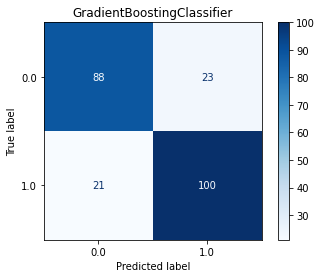

In [88]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
predictions = gbc.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, predictions, cmap = plt.cm.Blues)
plt.title('GradientBoostingClassifier')

In [89]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.81      0.79      0.80       111
         1.0       0.81      0.83      0.82       121

    accuracy                           0.81       232
   macro avg       0.81      0.81      0.81       232
weighted avg       0.81      0.81      0.81       232



In [90]:
score = accuracy_score(y_test, predictions)

new_row = {"Model": "GBC", "Accuracy Score": score}
models = models.append(new_row, ignore_index=True)

**Let's see how our models did**

In [91]:
models.sort_values(by="Accuracy Score", ascending=False)

,Model,Accuracy Score
10,ETC,0.862069
8,XGBoost,0.840517
9,CatBoost,0.840517
4,RandomForest,0.836207
5,XGBoost,0.836207
6,CatBoost,0.836207
7,XGBoost,0.836207
1,KNN,0.823276
2,SVM,0.810345
11,GBC,0.810345


> **Let's test a little more to see the reliability of the models. let's do a CV**

In [92]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = CatBoost, X = X_train, y = y_train, cv = 10)
print(accuracies.mean()) # Bias
print(accuracies.std()) # variance

0.8400621118012422
0.04316094897307819


**I used the ExtraTreeClassifier algorithm because it gave us the fewest false negatives.**

**Let's see what level of importance our model gave to each variable, it is interesting to know (according to the model) the incidence of each variable when predicting a patient as positive.**

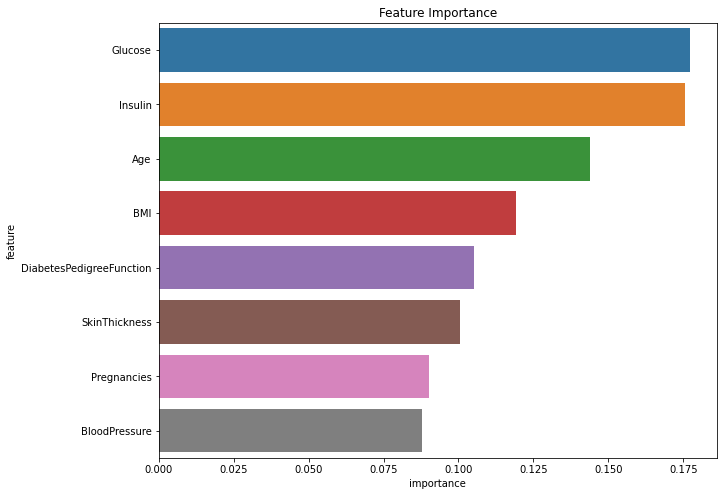

In [93]:
tmp=pd.DataFrame({'feature':df_eda.drop('Outcome',axis=1).columns,
                 'importance':etc.feature_importances_}).sort_values(by='importance',ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(x=tmp.importance ,y=tmp.feature).set_title('Feature Importance')
plt.show()

# Hyperparameter tunning whith Optuna

In [99]:
import optuna  
from optuna.visualization.matplotlib import plot_optimization_history
from optuna.visualization.matplotlib import plot_contour
from optuna.visualization.matplotlib import plot_edf
from optuna.visualization.matplotlib import plot_intermediate_values
from optuna.visualization.matplotlib import plot_parallel_coordinate
from optuna.visualization.matplotlib import plot_param_importances
from optuna.visualization.matplotlib import plot_slice
from sklearn.metrics import recall_score

## Extra tree classifier

In [97]:
def objetive(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 200, 1500),
          'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
          'max_depth': trial.suggest_int('max_depth', 3 ,10), 
          'max_features': trial.suggest_float('max_features', 0.25, 1.0)
          }
    trial_etc = ExtraTreesClassifier(**param, random_state = 1)
    trial_etc.fit(X_train,y_train)
    predictions = trial_etc.predict(X_test)
    

    score = recall_score(y_test, predictions)
    score1 = accuracy_score(y_test, predictions)
    print("---. ","Recall: ",score," .---")
    print("---. ","Accuracy: ",score1," .---")
    return score1

In [ ]:
study = optuna.create_study(direction = 'maximize')
study.optimize(objetive, n_trials = 150, n_jobs= -1)

In [103]:
study.best_params

{'n_estimators': 552,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 0.9328364627751397}

<AxesSubplot:title={'center':'Optimization History Plot'}, xlabel='#Trials', ylabel='Objective Value'>

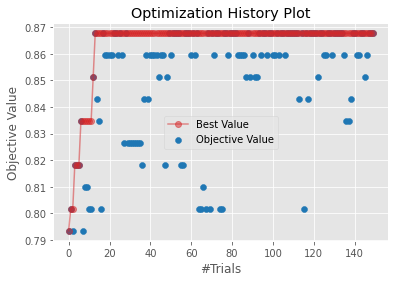

In [105]:
plot_optimization_history(study)

<AxesSubplot:title={'center':'Hyperparameter Importances'}, xlabel='Importance for Objective Value', ylabel='Hyperparameter'>

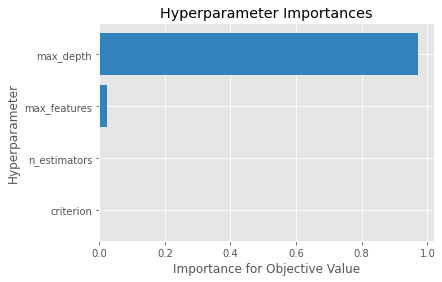

In [107]:
plot_param_importances(study)

array([<AxesSubplot:xlabel='max_depth', ylabel='Objective Value'>,
       <AxesSubplot:xlabel='max_features'>], dtype=object)

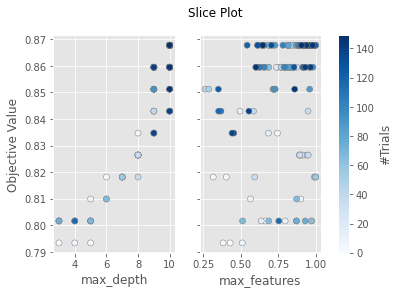

In [108]:
plot_slice(study, ['max_features','max_depth'])

# CatBoost

In [109]:
# CatBoost
def objetive1(trial):
    param1 = {
        'depth': trial.suggest_int('depth', 3, 10),
          'iterations': trial.suggest_int('iterations', 250, 1000),
          'learning_rate': trial.suggest_float('learning_rate', 0.03 ,0.3), 
          'l2_leaf_reg': trial.suggest_int('l2_leaf_reg', 3, 100),
          'border_count': trial.suggest_int('border_count', 32, 200)
          }
    trial_cat = CatBoostClassifier(**param1, random_state = 1)
    trial_cat.fit(X_train,y_train)
    predictions = trial_cat.predict(X_test)
    

    score = recall_score(y_test, predictions)
    score1 = accuracy_score(y_test, predictions)
    print("---. ","Recall: ",score," .---")
    print("---. ","Accuracy: ",score1," .---")
    return score1

In [ ]:
study1 = optuna.create_study(direction = 'maximize')
study1.optimize(objetive1, n_trials = 70, n_jobs= -1)

In [111]:
study1.best_params

{'depth': 8,
 'iterations': 697,
 'learning_rate': 0.18476011919157947,
 'l2_leaf_reg': 12,
 'border_count': 152}

In [112]:
cat_tuned = study1.best_params # +1

Text(0.5, 1.0, 'CatBoost')

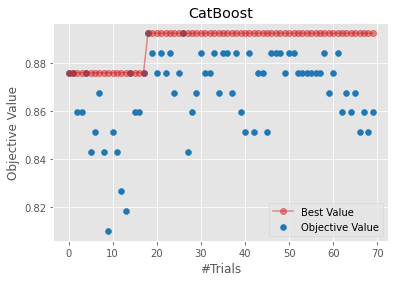

In [113]:
plot_optimization_history(study1)
plt.title("CatBoost")

Text(0.5, 1.0, 'CatBoost')

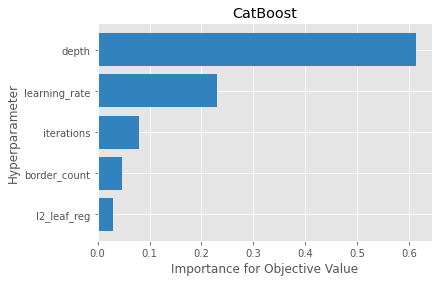

In [114]:
plot_param_importances(study1)
plt.title("CatBoost")

Text(0.5, 1.0, 'CatBoost')

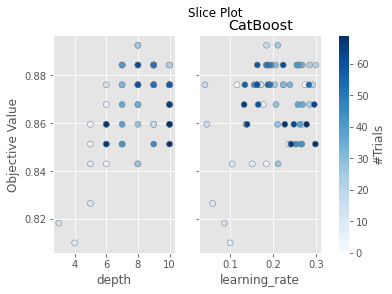

In [116]:
plot_slice(study1, ['depth','learning_rate'])
plt.title("CatBoost")

<AxesSubplot:title={'center':'Empirical Distribution Function Plot'}, xlabel='Objective Value', ylabel='Cumulative Probability'>

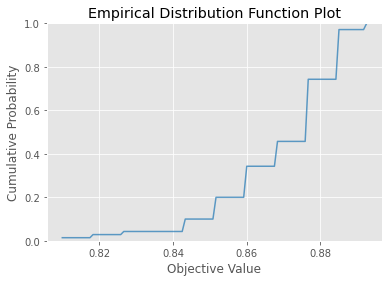

In [117]:
plot_edf(study1)

# RandomForest

In [118]:
def objetive2(trial):
    param2 = {
        'n_estimators': trial.suggest_int('n_estimators', 200, 2000),
          'bootstrap': trial.suggest_categorical('boostrap', ['True', 'False']),
          'max_depth': trial.suggest_int('max_depth', 3 ,10), 
          'max_features': trial.suggest_categorical('max_features', ['auto', 'sqrt']),
          'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
          'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy'])
          }
    trial_rf = RandomForestClassifier(**param2, random_state = 1)
    trial_rf.fit(X_train,y_train)
    predictions = trial_rf.predict(X_test)
    

    score = recall_score(y_test, predictions)
    score1 = accuracy_score(y_test, predictions)
    print("---. ","Recall: ",score," .---")
    print("---. ","Accuracy: ",score1," .---")
    return score1

In [ ]:
study2 = optuna.create_study(direction = 'maximize')
study2.optimize(objetive2, n_trials = 150, n_jobs= -1)

In [120]:
study2.best_params

{'n_estimators': 1819,
 'boostrap': 'True',
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_split': 4,
 'criterion': 'gini'}

In [121]:
rf_tuned = study2.best_params

<AxesSubplot:title={'center':'Optimization History Plot'}, xlabel='#Trials', ylabel='Objective Value'>

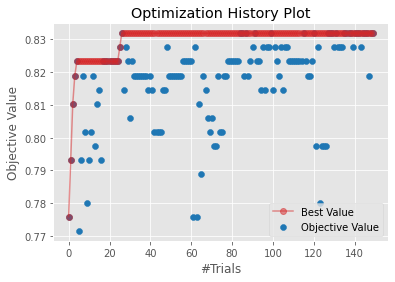

In [122]:
plot_optimization_history(study2)

<AxesSubplot:title={'center':'Hyperparameter Importances'}, xlabel='Importance for Objective Value', ylabel='Hyperparameter'>

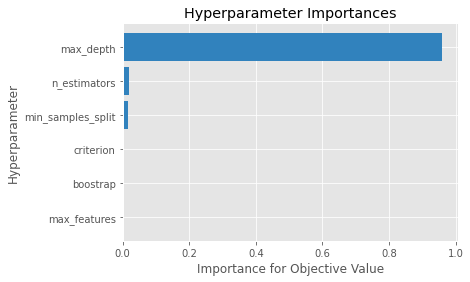

In [123]:
plot_param_importances(study2)

<AxesSubplot:title={'center':'Slice Plot'}, xlabel='max_depth', ylabel='Objective Value'>

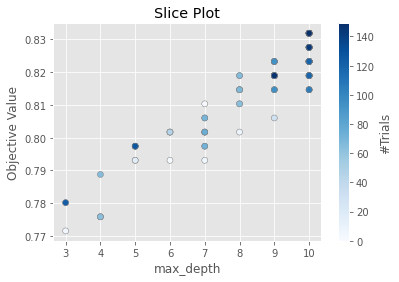

In [124]:
plot_slice(study2, ['max_depth']) 

# XGBoost

In [126]:
def objetive3(trial):
    param3 = {
            'booster': trial.suggest_categorical("booster", ['gbtree', 'gblinear', 'dart']),
            'lambda': trial.suggest_float("lambda", 1e-8, 1.0, log=True),
            'alpha': trial.suggest_float("alpha", 1e-8, 1.0, log=True),
            "n_estimators": trial.suggest_int("n_estimatos", 500, 1000),
            "gamma": trial.suggest_int("gamma", 0, 2),
            "max_depth": trial.suggest_int("max_dept", 3, 10),
            "n_jobs": (-1)
        }

    trial_xgb = XGBClassifier(**param3, random_state = 1)
    trial_xgb.fit(X_train,y_train)
    predictions = trial_xgb.predict(X_test)
    

    score = recall_score(y_test, predictions)
    score1 = accuracy_score(y_test, predictions)
    print("---. ","Recall: ",score," .---")
    print("---. ","Accuracy: ",score1," .---")
    return score1

In [ ]:
study3 = optuna.create_study(direction = 'maximize')
study3.optimize(objetive3, n_trials = 70, n_jobs= -1)

In [128]:
xgb_tuned = study3.best_params 

Text(0.5, 1.0, 'XGB')

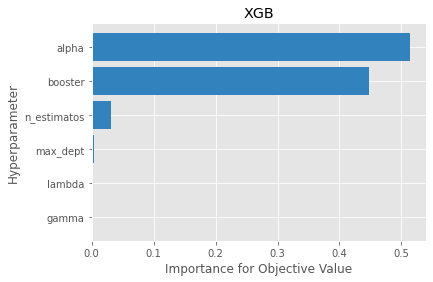

In [129]:
plot_param_importances(study3)
plt.title('XGB')

Text(0.5, 1.0, 'XGB')

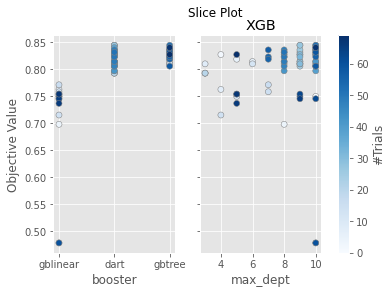

In [130]:
plot_slice(study3, ['booster','max_dept'])
plt.title('XGB')

# KNN

In [131]:
def objetive4(trial):
    param4 = {
            'n_neighbors' : trial.suggest_int('n_neighbors', 5, 20),
            'weights' : trial.suggest_categorical('weights', ['uniform','distance']),
            'metric' : trial.suggest_categorical('metric', ['minkowski','euclidean','manhattan']),
            'algorithm' : trial.suggest_categorical('algorithm', ['auto', 'ball_tree', 'kd_tree'])
        }

    trial_knn = KNeighborsClassifier(**param4)
    trial_knn.fit(X_train,y_train)
    predictions = trial_knn.predict(X_test)
    

    score = recall_score(y_test, predictions)
    score1 = accuracy_score(y_test, predictions)
    print("---. ","Recall: ",score," .---")
    print("---. ","Accuracy: ",score1," .---")
    return score1

In [ ]:
study4 = optuna.create_study(direction = 'maximize')
study4.optimize(objetive4, n_trials = 150, n_jobs= -1)

In [133]:
knn_tuned = study4.best_params

Text(0.5, 1.0, 'KNN')

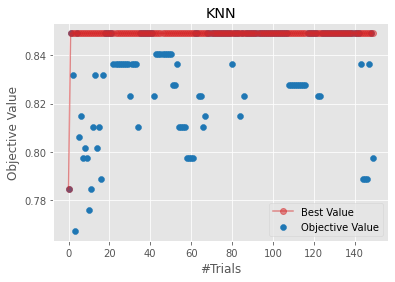

In [134]:
plot_optimization_history(study4)
plt.title('KNN')

Text(0.5, 1.0, 'KNN')

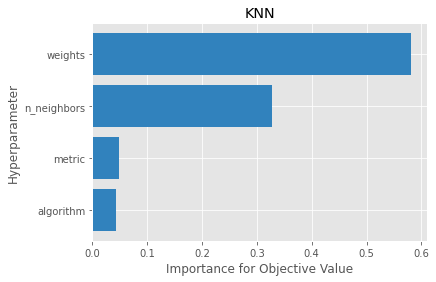

In [135]:
plot_param_importances(study4)
plt.title('KNN')

# Voting Classifier

In [137]:
from sklearn.ensemble import VotingClassifier
eclf1 = VotingClassifier(estimators= [('ExtraTreeClassifier', etc), 
                                      ('CatBoost', CatBoostClassifier(**cat_tuned)), 
                                      ('Randomforest', randomforest),
                                      ('XGBoost', XGBClassifier(**xgb_tuned)),
                                      ('KNM', KNeighborsClassifier(**knn_tuned))])

In [ ]:
eclf1.fit(X_train, y_train)
voting_pred= eclf1.predict(X_test)

Text(0.5, 1.0, 'voting_pred')

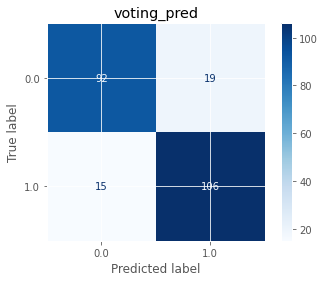

In [139]:
ConfusionMatrixDisplay.from_predictions(y_test, voting_pred, cmap = plt.cm.Blues)
plt.title('voting_pred')

In [141]:
print(classification_report(y_test, voting_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.83      0.84       111
         1.0       0.85      0.88      0.86       121

    accuracy                           0.85       232
   macro avg       0.85      0.85      0.85       232
weighted avg       0.85      0.85      0.85       232



### Thank you for reading 🤗